In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")

In [243]:
pwd

'/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge'

In [244]:
path = '/Users/yuqingdai/Documents/GitHub/Stock-Erdos/Data/df.csv'

In [245]:
df1= pd.read_csv(path, parse_dates=['Date'])
df1 = df1.rename(columns = {"Date":"ds","Close":"y"}) 
df1 

,ds,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...
4515,2021-01-25,3855.36,1.05,0.09,7414942.0,95.72,1.58,6.3,52.78,204.3,576466.0
4516,2021-01-26,3849.62,1.05,0.09,7414942.0,95.72,1.58,6.3,52.61,204.3,576466.0
4517,2021-01-27,3750.77,1.04,0.09,7404926.0,95.72,1.58,6.3,52.81,204.3,576466.0
4518,2021-01-28,3787.38,1.07,0.09,7404926.0,95.72,1.58,6.3,52.26,204.3,576466.0


In [246]:
import datetime as datetime
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.ds < ctf_date , ].copy()
df

,ds,y,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,3.5,51.36,196.7,525810.0
4286,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,3.5,49.78,196.7,525810.0
4287,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,3.5,48.67,196.7,525810.0
4288,2020-02-27,2978.76,1.30,1.58,4158637.0,135.28,1.79,3.5,47.17,196.7,525810.0


In [247]:
# from datetime import datetime
# p = 0.9
# # Train around 90% of dataset 
# # cutoff = int((p*len(df)//100)*100)
# cutoff = int(p*len(df))
# df_train = df[:cutoff].copy()
# df_test = df.drop(df_train.index).copy()

# print(df_train, df_test)

In [7]:
# tmp_pred_periods =100 # predicted periods 
# # use around 9 * tem_pred_periods as train_train data
# start = int(tmp_pred_periods * (p*10) + len(df_train) % tmp_pred_periods)
# num_winds = int((df_train.shape[0]-start)/tmp_pred_periods)
# print(start, num_winds)

In [194]:
pred_periods = 252

In [195]:
p = 0.9
tmp_pred_periods= 100
# mod = len(df) % tmp_pred_periods
# print(mod, (p*10 * tmp_pred_periods) + mod, start + p * (len(df) - start))

In [199]:
num_winds = int(pred_periods * (p*10)//100 + 1)
num_winds

23

In [204]:
start = len(df) - num_winds *tmp_pred_periods - pred_periods
start

1116

In [205]:
cutoff = start + num_winds * tmp_pred_periods
cutoff

3416

In [231]:
cutoff -start

2300

In [206]:
len(df)-cutoff

252

In [207]:
df_train = df[:cutoff].copy()
df_test = df.drop(df_train.index).copy()

In [208]:
#prophet part 
from fbprophet import Prophet
pro_pred = []

# use accumulated data to predict the next pred_size data
for i in range(num_winds):
    end = start+ i*tmp_pred_periods
    
    tmp_train = df_train.iloc[: end].copy()
    
    fbp = Prophet(daily_seasonality=True) #????
    # fit close price using fbprophet model
    fbp.fit(tmp_train[['ds','y']])
    
    # predict pred_size futures and get the forecast price 
    fut = fbp.make_future_dataframe(periods = tmp_pred_periods)
    tmp_forecast = fbp.predict(fut) 
    if (i == 0):
        pro_pred.append(tmp_forecast[:start].yhat)
      
    # only require the forcast on test data of temporary training data
    pred = tmp_forecast[end:].yhat
    pro_pred.append(pred)

In [209]:
pro_pred

[0       1218.764627
 1       1216.251356
 2       1213.811815
 3       1211.154249
 4       1209.290890
            ...     
 1111    1098.711065
 1112    1101.156188
 1113    1103.548637
 1114    1105.543053
 1115    1108.102554
 Name: yhat, Length: 1116, dtype: float64,
 1116    1105.078898
 1117    1107.123090
 1118    1113.700610
 1119    1115.769261
 1120    1117.682964
            ...     
 1211    1078.885931
 1212    1080.193658
 1213    1082.564012
 1214    1079.836003
 1215    1082.638016
 Name: yhat, Length: 100, dtype: float64,
 1216    1242.651876
 1217    1245.326087
 1218    1249.552691
 1219    1251.973566
 1220    1254.266545
            ...     
 1311    1331.537064
 1312    1332.931581
 1313    1334.588555
 1314    1334.167507
 1315    1335.857262
 Name: yhat, Length: 100, dtype: float64,
 1316    1147.257375
 1317    1147.409442
 1318    1138.959853
 1319    1138.706805
 1320    1146.792262
            ...     
 1411    1193.500425
 1412    1194.044273
 1413    119

In [210]:
# flat the pro_pred
flat_pro_pred = [item for l1 in pro_pred for item in l1]

In [211]:
df_train['fbsp'] = pd.Series(flat_pro_pred)

In [212]:
from fbprophet import Prophet
# pred_periods = len(df_test)
fbp = Prophet(daily_seasonality=True)

# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods)
forecast = fbp.predict(fut) 

In [213]:
# len(df_test)

In [218]:
df_test['fbsp'] = forecast.loc[cutoff:, 'yhat']
df_test

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp
3416,2019-02-27,2792.38,2.69,2.40,3974590.0,140.02,2.08,20.7195,3.8,1581.050049,56.92,199.2,502627.0,15.60,2894.685866
3417,2019-02-28,2784.49,2.73,2.40,3974590.0,140.12,1.98,20.7195,3.8,1575.550049,57.21,199.2,502627.0,15.65,2895.821692
3418,2019-03-01,2803.69,2.76,2.41,3974590.0,140.12,1.98,21.0909,3.8,1589.640015,55.76,200.8,510320.0,14.87,2896.822420
3419,2019-03-04,2792.81,2.72,2.41,3974590.0,140.12,1.98,21.0909,3.8,1575.439941,56.60,200.8,510320.0,15.35,2897.274933
3420,2019-03-05,2789.65,2.72,2.41,3974590.0,140.12,1.98,21.0909,3.8,1568.280029,56.55,200.8,510320.0,15.56,2898.357898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3085.074930
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3085.493162
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3086.398961
3666,2020-02-27,2978.76,1.30,1.58,4158637.0,135.28,1.79,25.3952,3.5,1497.869995,47.17,196.7,525810.0,26.60,3085.948568


In [219]:
# df_test = df_test.dropna()
# df_test

In [220]:
fc_df = pd.DataFrame(data={'ds': df.ds.to_numpy().ravel(), 'fbsp': forecast.yhat})
# fc_df

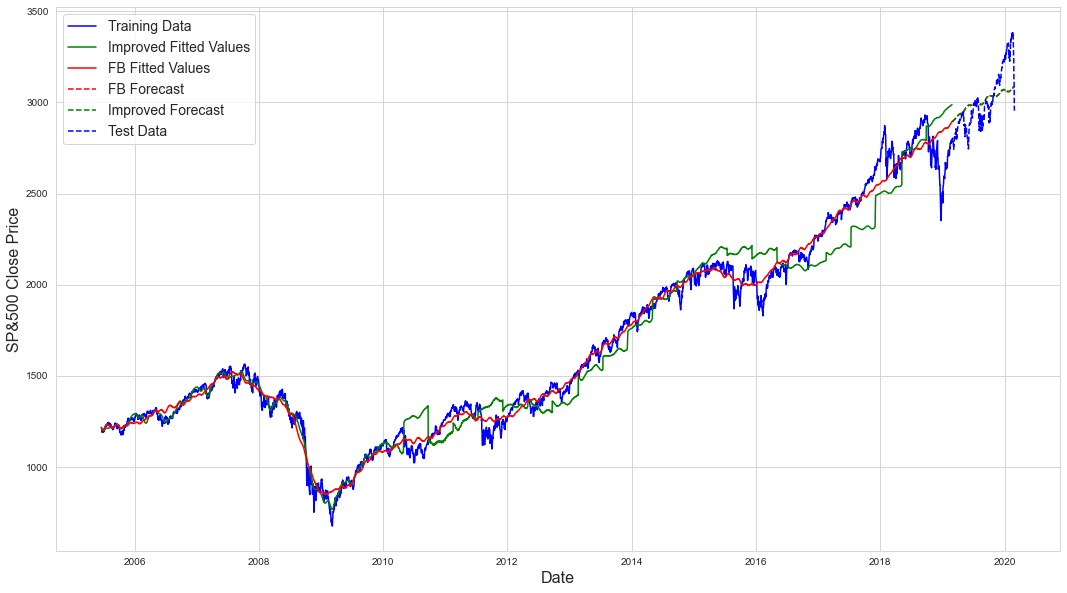

In [221]:
plt.figure(figsize=(18,10))

# plot the training data
plt.plot(df_train.ds,df_train.y,'b', label = "Training Data")

plt.plot(df_train.ds,df_train.fbsp,'g-', label = "Improved Fitted Values")

# plot the fit
plt.plot(df_train.ds, fc_df[:cutoff].fbsp,'r-', label = "FB Fitted Values")

# plot the forecast
plt.plot(df_test.ds, fc_df[cutoff:].fbsp,'r--', label = "FB Forecast")
plt.plot(df_test.ds,  df_test.fbsp,'g--',label = "Improved Forecast")
plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("SP&500 Close Price", fontsize=16)

plt.show()

In [222]:
# pd.concat([df_train,df_test])

In [223]:
# df_test

In [224]:
df2 = df.copy()
# df2['fbsp1'] = fc_df.fbsp
# df2['diff1'] =  df2['y'] - df2['fbsp1']
df2['fbsp'] = pd.concat([df_train,df_test]).fbsp
df2['diff'] = df2['y'] - df2['fbsp']


In [225]:
df2 = df2.dropna()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2.set_index(df2['ds'])
df2 = df2.drop(columns=['ds'])

In [226]:
df3 = df2.loc[df2.index[start]:,].copy()
df3

,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp,diff
ds,,,,,,,,,,,,,,,
2009-12-07,1103.25,3.44,0.12,2204380.0,46.72,2.10,21.8776,9.9,603.559998,73.89,178.1,346072.0,22.50,1105.078898,-1.828898
2009-12-08,1091.94,3.40,0.12,2204380.0,46.72,2.10,21.8776,9.9,597.700012,72.59,178.1,346072.0,23.48,1107.123090,-15.183090
2009-12-09,1095.95,3.45,0.12,2186762.0,46.72,2.10,21.8776,9.9,598.030029,70.67,178.1,346072.0,23.05,1113.700610,-17.750610
2009-12-10,1102.35,3.49,0.12,2186762.0,46.72,2.10,21.8776,9.9,595.380005,70.54,178.1,346072.0,22.50,1115.769261,-13.419261
2009-12-11,1106.41,3.55,0.12,2186762.0,46.72,2.10,21.8776,9.9,600.369995,69.86,178.1,346072.0,22.10,1117.682964,-11.272964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15,3085.074930,140.815070
2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95,3085.493162,42.716838
2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45,3086.398961,29.991039


In [228]:
df3.iloc[2268]

y       2.596640e+03
tby     2.740000e+00
ffr     2.400000e+00
fta     4.056563e+06
eps     1.395800e+02
div     2.090000e+00
per     2.012130e+01
une     4.000000e+00
rus     1.445430e+03
wti     5.242000e+01
ppi     1.991000e+02
rfs     5.027240e+05
vix     1.985000e+01
fbsp    2.948541e+03
diff   -3.519007e+02
Name: 2019-01-10 00:00:00, dtype: float64

In [236]:
df3.to_csv(r'/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge/data/dt/dff1.csv')